In [369]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split

df = pd.read_csv("Titanic-Dataset.csv")
print(df.columns)
scaler = StandardScaler()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


MSE: 0.21787709497206703
RMSE: 0.46677306581685607
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       106
           1       0.77      0.67      0.72        73

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

Optimization terminated successfully.
         Current function value: 0.445489
         Iterations 6


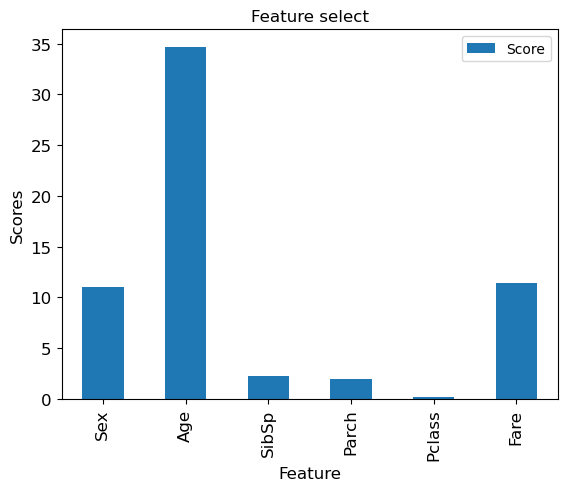

In [370]:
#Logistic Regression from scratch 
class LogisticRegression():
    def __init__(self, X, learning_rate = 0.1, num_iters = 10000):
        self.lr = learning_rate 
        self.num_iters = num_iters 
        
        # m for number training examples, n for number features 
        self.m, self.n = X.shape
        
    def train(self, X, y):
        self.weights = np.zeros((self.n, 1))
        self.bias = 0 
        self.costs = []
        for it in range(self.num_iters + 1):
            # calculate hypothesis 
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
            
            # cost calculation
            c = -1/self.m * np.sum(y*np.log(y_predict) + (1 - y)*np.log(1 - y_predict))
            self.costs.append(c)
            dw = 1/self.m * np.dot(X.T, (y_predict - y))
            db = 1/self.m * np.sum(y_predict - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        
        return self.weights, self.bias
            
    def predict(self, X):
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = y_predict > 0.5
        
        return y_predict_labels
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) 
    
    
if __name__ == '__main__':
    np.random.seed(1)
    
    df["Sex"] = df["Sex"].map({"male": 1, "female": 0})

    X = scaler.fit_transform(df[["Sex", "Age", "SibSp", "Parch", "Pclass", "Fare"]].fillna(0).astype(float))
    y = df["Survived"].values[:,np.newaxis]
    
    #Training data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    
    logreg = LogisticRegression(X_train)
    w, b = logreg.train(X_train,y_train)
    y_predict = logreg.predict(X_test)
    
    #finding MSE and RMSE
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    print("MSE:", mse)
    print("RMSE:", rmse)

    
    #classification report
    print(classification_report(y_test, y_predict))
    
    
    #FINDING FEATURES 
    #adding p-value 
    X_train_constant = sm.add_constant(X_train)
    log_model = sm.Logit(y_train, X_train_constant)
    result = log_model.fit()
    p_values = result.pvalues
    scores = -np.log10(p_values)
    p_values = p_values[:6]  
    scores = scores[:6]
    
    feature_names = ["Sex", "Age", "SibSp", "Parch", "Pclass", "Fare"]
    feat_select = pd.DataFrame({
        "Feature": feature_names,
        "P_Value": p_values,
        "Score": scores
    })
    ax = feat_select[["Feature", "Score"]].plot(kind="bar", x="Feature", title="Feature select", legend=True, fontsize=12)
    ax.set_xlabel("Feature", fontsize=12)
    ax.set_ylabel("Scores", fontsize=12)
    plt.show()
    

Accuracy: 0.6871508379888268


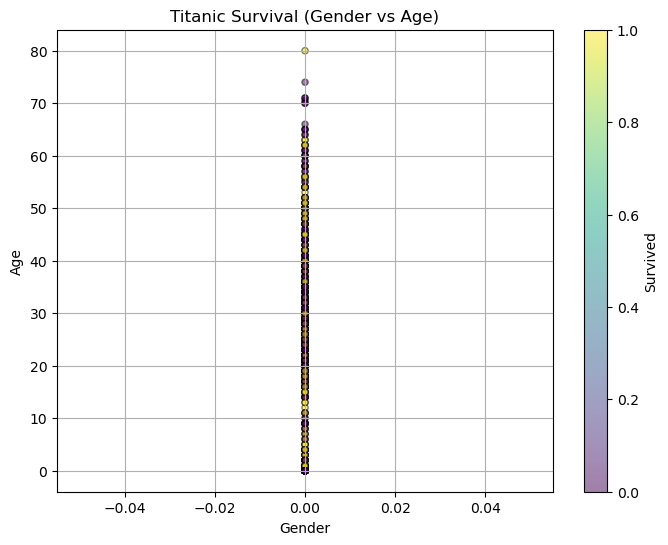

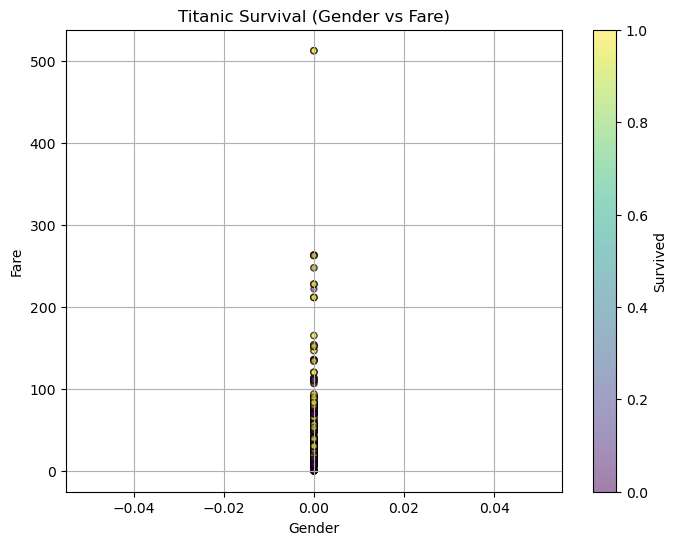

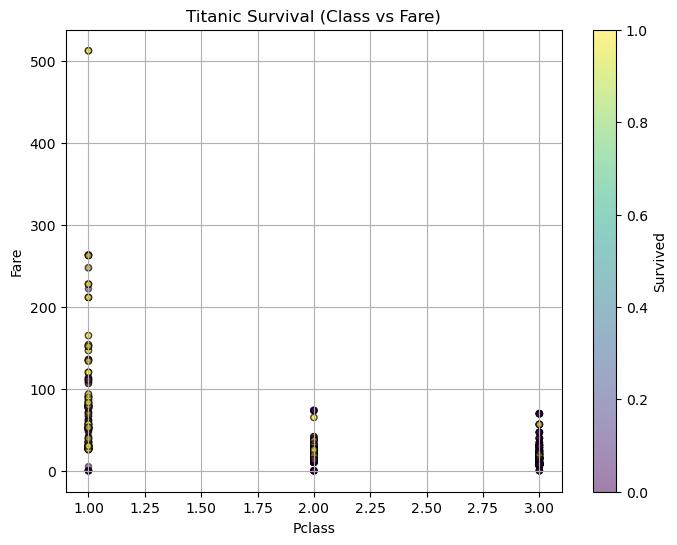

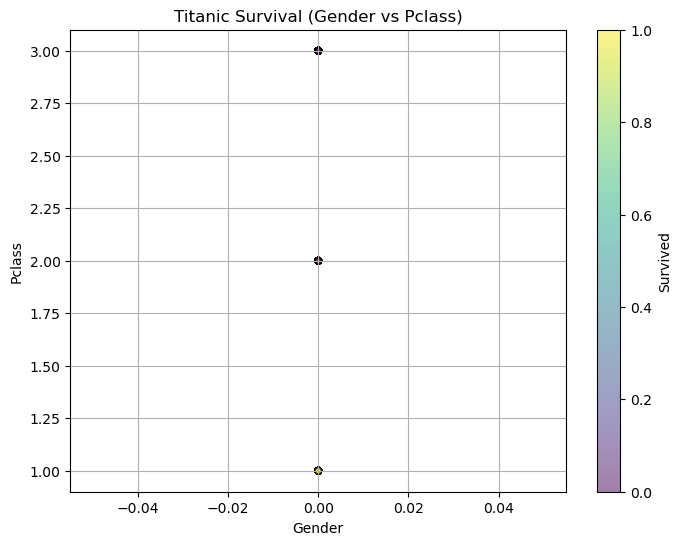

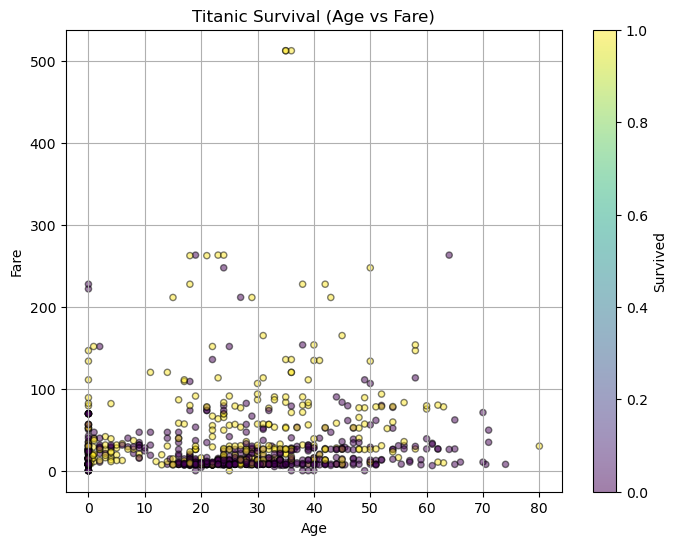

In [371]:
#KNN 
#creating euclidean distance 

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2)**2))
    return distance 

class KNN:
    def __init__(self, k = 3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y 
    
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions 
    
    def _predict(self, x):
        distance = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        #getting the closest k 
        k_vals = np.argsort(distance)[:self.k]
        k_labels = [self.y_train[i] for i in k_vals]
        
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]
    
if __name__ == '__main__':
    df["Sex"] = df["Sex"].map({"male": 1, "female": 0})
    df.fillna(0, inplace=True)

    #features
    X = df[["Sex", "Age", "SibSp", "Parch", "Pclass", "Fare"]].values
    y = df["Survived"].values
    
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    knn = KNN(k=5)
    knn.fit(X_train, y_train)

    #predictions
    y_prediction = knn.predict(X_test)

    #accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    #data and decision boundries 
    def plot_data(X, y, title, xlabel, ylabel):
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, alpha=0.5)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.colorbar(label='Survived')
        plt.grid(True)
        plt.show()

#gender v. age
X_vis = df[["Sex", "Age"]].values
plot_data(X_vis, y, "Titanic Survival (Gender vs Age)", "Gender", "Age")

#gender v. fare
X_vis = df[["Sex", "Fare"]].values
plot_data(X_vis, y, "Titanic Survival (Gender vs Fare)", "Gender", "Fare")

#class v. fare
X_vis = df[["Pclass", "Fare"]].values
plot_data(X_vis, y, "Titanic Survival (Class vs Fare)", "Pclass", "Fare")

#gender v. class
X_vis = df[["Sex", "Pclass"]].values
plot_data(X_vis, y, "Titanic Survival (Gender vs Pclass)", "Gender", "Pclass")

X_vis = df[["Age", "Fare"]].values
plot_data(X_vis, y, "Titanic Survival (Age vs Fare)", "Age", "Fare")

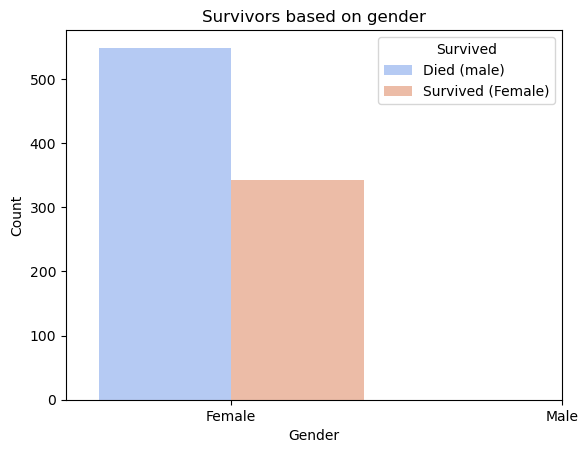

In [372]:
#BAR GRAPHS 
sns.countplot(x="Sex", hue="Survived", data=df, palette="coolwarm")
plt.title("Survivors based on gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0, 1], ["Female", "Male"])
plt.legend(title="Survived", labels=["Died (male)", "Survived (Female)"])
plt.show()

In [373]:
# Decision tree
class Node:
    def __init__(self, feature = None, threshold = None, left = None, right = None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    def is_leaf_node(self):
        return self.value is not None 
        
class DecisionTree:
    def __init__(self, min_samp_split = 2, max_depth = 100, n_feat = None):
        self.min_samp_split = min_samp_split
        self.max_depth = max_depth
        self.n_feat = n_feat
        self.root = None
        
    
    def fit(self, X, y):
        self.n_feat = X.shape[1] if not self.n_feat else min(X.shape[1], self.n_feat)
        self.root = self._grow_tree(X, y, depth = 0)
    
    def _grow_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samp_split):
            leaf_value = self._most_common_label(y)
            return Node(value = leaf_value)
        
        #finding best split
        feat_idx = np.random.choice(n_features, self.n_feat, replace = False)
        best_feature, best_threshold = self._best_split(X, y, feat_idx)
        
        #creating child ndes 
        left_idx, right_idx = self._split(X[:, best_feature], best_threshold)
        
        if len(left_idx) == 0 or len(right_idx) == 0:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        
        left = self._grow_tree(X[left_idx, :], y[left_idx], depth + 1)
        right = self._grow_tree(X[right_idx, :], y[right_idx], depth + 1)
        return Node(best_feature, best_threshold, left, right)
    
    def _best_split(self, X, y, feat_idx):
        best_gain = -1
        split_idx = None
        split_threshold = None 
        
        for feat in feat_idx:
            X_column = X[:, feat]
            threshold = np.unique(X_column)
            
            for thr in threshold:
                gain = self._information_gain(y, X_column, thr)
                
                if gain > best_gain:
                    best_gain = gain 
                    split_idx = feat 
                    split_threshold = thr 
        
        return split_idx, split_threshold
    
    
    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])
    
    def _information_gain(self, y, X_column, threshold):
            #getting the parent entropy
            parent_entropy = self._entropy(y)
            
            #creating children 
            left_idx, right_idx = self._split(X_column, threshold)
            
            if len(left_idx) == 0 or len(right_idx) == 0:
                return 0
            
            #caluclating avg. weighted children entropy 
            n = len(y)
            num_l, num_r = len(left_idx), len(right_idx)
            e_l, e_r = self._entropy(y[left_idx]), self._entropy(y[right_idx])
            child_entropy = (num_l/n) * e_l + (num_r/n) * e_r
            
            #find information gain 
            information_gain = parent_entropy - child_entropy
            return information_gain
            
    def _split(self, X_column, split_threshold):
        left_idx = np.argwhere(X_column <= split_threshold).flatten()
        right_idx = np.argwhere(X_column > split_threshold).flatten()
        if len(left_idx) == 0 or len(right_idx) == 0:
            return np.array([]), np.array([]) #empty if out of index for array
        return left_idx, right_idx
        
    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value
    
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
    
if __name__ == '__main__':
    #preprocessing
    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
    
    #splitting feats and the target vals 
    X = df[["Sex", "Age", "SibSp", "Parch", "Pclass", "Fare"]].values
    y = df['Survived'].values
    
    #training 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    clf = DecisionTree(max_depth = 10)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy) # score of 72 

Accuracy: 0.7206703910614525


/var/folders/5g/2ch17nb94z7_9y4f5xs6mrsh0000gn/T/ipykernel_26449/328661944.py:118: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
